# Analysis Of Variance (ANOVA)

### Definition

In statistics and data analysis, hypothesis testing is very important because when we perform experiments we usually don't have access to all members of a population, so we take sample measurements to make inferences about the population. These inferences are hypotheses. In essence, a statistical hypothesis test is a method for testing a hypothesis about a parameter in a population using data measured in a sample.


### Assumptions

* Independent samples – this means that an observation cannot be influenced by the previous one or the next one. This assumption ensures that data are collected randomly within the sample space.

* Homogeneity of variances between groups – the variance within each group is equal (or at least approximately) to that within all groups. In this way, each treatment contributes equally to the sum of squares.

* Residuals follow a normal distribution – it is assumed that the general mean of the residuals is equal to zero, that is, they are normally distributed. This assumption is not very restrictive depending on the sample size.


In [1]:
# Data frames.
import pandas as pd

# Plotting.
import seaborn as sns

# Fancier, statistical plots.
import matplotlib.pyplot as plt
%matplotlib inline

#Python scientific programming conference library
from scipy import stats

#chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table
from scipy.stats import chi2_contingency

#chi-squared stats between each non-negative feature and class.
from scipy.stats import chi2

In [2]:
# Using the pandas library to import data
df_1 = pd.read_csv('Datasets//ToddlerAutism.csv',engine='python', sep=',')

### Toddler data Description

Source: Fayez Thabtah
Department of Digital Technology
Manukau Institute of Technology,
Auckland, New Zealand
fadi.fayez@manukau.ac.nz

* Data Type: Predictive and Descriptive: Nominal / categorical, binary and continuous 
* Task: Classification
* Attribute Type: Categorical, continuous and binary  
* Area: Medical, health and social science
* Format Type: Non-Matrix
* Does your data set contain missing values? No
* Number of Instances (records in your data set): 1054
* Number of Attributes (fields within each record): 18 including the class variable 
* Attribute Information:  For Further information about the attributes/feature see below table.


Table 1: Details of variables mapping to the Q-Chat-10 screening methods

Variable in Dataset   | Corresponding Q-chat-10-Toddler Features
:---------: | :------
A1 | Does your child look at you when you call his/her name?
A2 | How easy is it for you to get eye contact with your child? 
A3 | Does your child point to indicate that s/he wants something? 
A4 | Does your child point to share interest with you? 
A5 | Does your child pretend? (e.g. care for dolls, talk on a toy phone)  
A6 | Does your child follow where you’re looking? 
A7 | If you or someone else in the family is visibly upset, does your child show signs of wan9ng to comfort them? 
A8 | Would you describe your child’s first words as: 
A9 | Does your child use simple gestures?  
A10| Does your child stare at nothing with no apparent purpose? 

In [3]:
#Renaming the columns
df = df_1.rename(columns={'Age_Mons': 'Age', 'Qchat-10-Score':'qchat_score', 'Family_mem_with_ASD':'family_asd', 'Class/ASD Traits ':'asd_traits'})
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,qchat_score,Sex,Ethnicity,Jaundice,family_asd,Who completed the test,asd_traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [4]:
# # Checking statistical details of the dataset
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,qchat_score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [5]:
# Checking dimensions
df = df[df['asd_traits'] != 'No']
df.shape

(728, 19)

In [6]:
# Understanding the dataset, columns, data types, number of records per column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 1 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 728 non-null    int64 
 1   A1                      728 non-null    int64 
 2   A2                      728 non-null    int64 
 3   A3                      728 non-null    int64 
 4   A4                      728 non-null    int64 
 5   A5                      728 non-null    int64 
 6   A6                      728 non-null    int64 
 7   A7                      728 non-null    int64 
 8   A8                      728 non-null    int64 
 9   A9                      728 non-null    int64 
 10  A10                     728 non-null    int64 
 11  Age                     728 non-null    int64 
 12  qchat_score             728 non-null    int64 
 13  Sex                     728 non-null    object
 14  Ethnicity               728 non-null    object
 15  Jaund

In [7]:
# check for null values
df.isnull().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age                       0
qchat_score               0
Sex                       0
Ethnicity                 0
Jaundice                  0
family_asd                0
Who completed the test    0
asd_traits                0
dtype: int64

## Five Steps to Conduct Hypothesis Testing

Regardless of the type of statistical hypothesis testing you are performing, there are five main steps to performing them:

### 1 . Set up a null and alternative hypothesis

Null hypothesis: can be considered the “control” of the experiment. The hypothesis is assumed to be true before we collect the data and usually has some kind of equal sign (≥, ≤, =).

Alternative hypothesis: it can be thought of as the “experiment”. This is what we want to prove to be true with our collected data and it usually has the opposite sign to the null hypothesis.

 
### 2. Choose a significance level α (or use the one assigned)

The significance level α is the threshold at which you accept to reject the null hypothesis. It is the probability of rejecting the null hypothesis when it is true. A significance level of 0.05 is more common, this indicates that you are okay with rejecting the null hypothesis if there is less than a 5% chance that the result I am seeing is actually due to randomness.

### 3. Determine the critical value (find the rejection region for the null hypothesis)

The critical value is a value in the test distribution compared to the test statistic to determine whether the null hypothesis should be rejected.

### 4. Calculate test statistic or p value

The test statistic is a value calculated from the data provided and then compared to the critical value to determine whether the null hypothesis should be rejected.

The p-value is the probability of observing a test statistic at least as large as the one observed, by chance, given the null hypothesis being true.

How do we know what kind of test statistic to calculate? It depends on the type of hypothesis testing we run. There are four types: z-test, t-test, ANOVA and chi-square tests. A z-test is used when comparing population means and when the population standard deviation is known. A t-test is used when comparing population means and the population standard deviation is not known. An ANOVA is used when comparing sample means across three or more groups. Lastly, a chi-square test is a non-parametric test used to test relationships between categorical variables.

### 5. Compare the test statistic value with the critical test statistic value, or p value with the significance level, to determine whether to reject the null hypothesis or not

If the test statistic is greater than the critical value, we reject the null hypothesis. If the test statistic is less than or equal to the critical value, we do not reject the null hypothesis.

If p <α , we reject the null hypothesis. If p ≥ α, we fail to reject the null hypothesis.

And there you have it, five steps to conducting hypothesis testing, so now let's conduct some hypothesis testing in Python using SciPy .

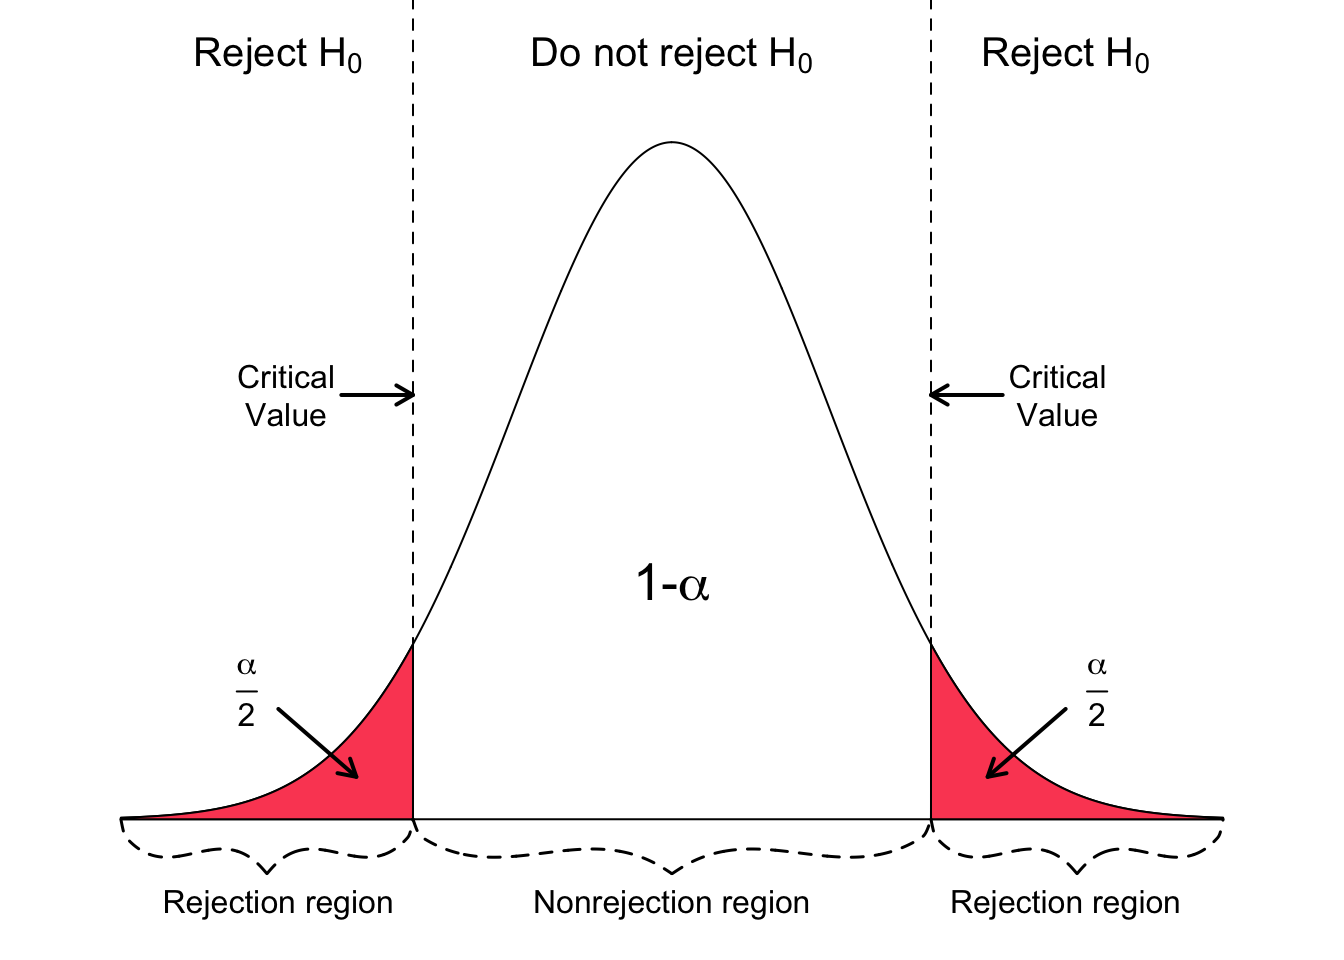

Next we will compare some groups:

*** 
**"Sex" vs "qchat_score"**

- Null Hypothesis: There is no statisical difference between male and female mean qchat scores.

- Alternative Hypothesis: There is a statistical difference between male and female mean qchat scores.

***

In [8]:
# Separate gender into two df's for independent T-test
male_df = df.loc[(df['Sex'] == 'm')]
female_df = df.loc[(df['Sex']== 'f')]

In [9]:
# Showing female dataset
female_df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,qchat_score,Sex,Ethnicity,Jaundice,family_asd,Who completed the test,asd_traits
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
13,14,1,1,1,1,0,0,1,0,1,1,15,7,f,middle eastern,yes,no,family member,Yes
17,18,1,1,1,0,1,1,1,1,0,1,12,8,f,middle eastern,yes,no,family member,Yes
19,20,1,1,1,0,1,0,1,1,0,1,12,7,f,black,no,no,family member,Yes
35,36,1,1,1,1,1,1,1,1,1,1,15,10,f,middle eastern,no,no,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,1029,0,0,1,1,1,1,0,0,1,0,22,5,f,Latino,no,no,family member,Yes
1031,1032,1,1,0,0,0,1,1,1,0,1,36,6,f,Others,no,yes,family member,Yes
1036,1037,1,1,0,1,0,1,1,1,0,0,14,6,f,asian,no,no,family member,Yes
1046,1047,0,1,0,1,1,1,1,1,1,0,24,7,f,middle eastern,no,no,family member,Yes


In [10]:
# Showing male dataset
male_df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,qchat_score,Sex,Ethnicity,Jaundice,family_asd,Who completed the test,asd_traits
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
5,6,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,family member,Yes
6,7,1,0,0,1,1,1,0,0,1,0,33,5,m,asian,yes,no,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,1045,1,1,1,1,1,1,1,1,1,1,25,10,m,asian,no,yes,family member,Yes
1045,1046,1,1,1,1,1,1,1,1,1,1,30,10,m,middle eastern,no,no,Health Care Professional,Yes
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes


In [11]:
## Descriptive asd traits separated by gender
df.groupby('Sex').asd_traits.describe()

,count,unique,top,freq
Sex,,,,
f,194,1,Yes,194
m,534,1,Yes,534


In [12]:
#find T critical value - Left-tailed test where q = a significance level and df = the degrees of freedom
stats.t.ppf(q=.05,df=22)

-1.7171443743802424

The T critical value is -1.7171. Thus, if the test statistic is less than this value, the results of the test are statistically significant.

In [13]:
#find T critical value - Right-tailed test where q = a significance level and df = the degrees of freedom
stats.t.ppf(q=1-.05,df=22)

1.717144374380242

The T critical value is 1.7171. Thus, if the test statistic is greater than this value, the results of the test are statistically significant.

In [14]:
#find T critical value - Two-tailed test where q = a significance level and df = the degrees of freedom
stats.t.ppf(q=1-.05/2,df=22)

2.0738730679040147

Whenever you perform a two-tailed test, there will be two critical values. In this case, the T critical values are 2.0739 and -2.0739. Thus, if the test statistic is less than -2.0739 or greater than 2.0739, the results of the test are statistically significant.

### Independent t-test

What is Statistical Significance Test?
In statistics, statistical significance means that the result that was produced has a reason behind it, it was not produced randomly, or by chance.

T-tests are used to determine if there is significant deference between means of two variables and lets us know if they belong to the same distribution. 

The function ttest_ind() takes two samples of same size and produces a tuple of t-statistic and p-value.

Alpha value is the level of significance - It is usually taken as 0.01, 0.05, or 0.1.

P value tells how close to extreme the data actually is. P value and alpha values are compared to establish the statistical significance. If p value <= alpha we reject the null hypothesis and say that the data is statistically significant. otherwise we accept the null hypothesis.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
https://www.w3schools.com/python/scipy/scipy_statistical_significance_tests.php

In [15]:
# Independent T-test of gender and qchat-score
print(stats.ttest_ind(male_df['qchat_score'], female_df['qchat_score'], equal_var=False))
print("-------------------------------------------------------------------------")
print('We fail to reject the null hypothesis since our p-value is more than 0.05')

Ttest_indResult(statistic=-0.3602431012464004, pvalue=0.7188758523230369)
-------------------------------------------------------------------------
We fail to reject the null hypothesis since our p-value is more than 0.05


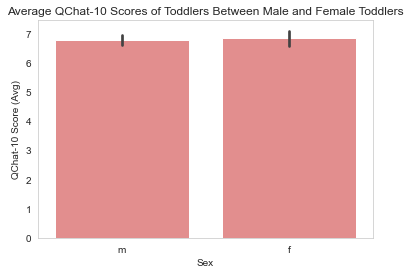

In [16]:
# Plotting Average QChat-10 Scores of Toddlers Between Male and Female Toddlers
sns.set_style("whitegrid",{'axes.grid' : False})
ax = sns.barplot(x = 'Sex', y = 'qchat_score', data = df, color='lightcoral')
ax.set_title('Average QChat-10 Scores of Toddlers Between Male and Female Toddlers')
ax.set_xlabel('Sex')
ax.set_ylabel('QChat-10 Score (Avg)')
plt.savefig('sex_qchat_score.png')
plt.show()

***
**"family_asd" vs "qchat_score"**

Null Hypothesis: There is not a statistical difference between mean qchat scores of individuals with immediate family that have ASD and those who dont.

Alternative Hypothesis: There is a statistical difference between mean qchat scores of individuals with immediate family that have ASD and those who dont.
***

In [17]:
# Separate family with ASD into df's for independent T-test
y_family = df.loc[(df['family_asd'] == 'yes')]
n_family = df.loc[(df['family_asd']== 'no')]

In [18]:
# Two sample T-test of family and qchat-score
print(stats.ttest_ind(y_family['qchat_score'], n_family['qchat_score'], equal_var=False))
print('We fail to reject the null hypothesis because our p-value is above 0.05')

Ttest_indResult(statistic=1.4272440393589116, pvalue=0.1554187508493741)
We fail to reject the null hypothesis because our p-value is above 0.05


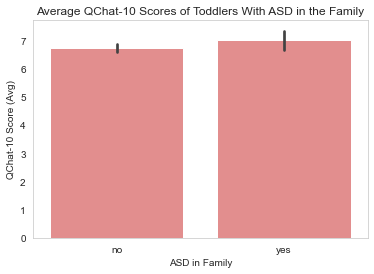

In [19]:
# Plotting Average QChat-10 Scores of Toddlers with ASD in family
sns.set_style("whitegrid",{'axes.grid' : False})
ax = sns.barplot(x = 'family_asd', y = 'qchat_score', data = df, color='lightcoral')
ax.set_title('Average QChat-10 Scores of Toddlers With ASD in the Family')
ax.set_xlabel('ASD in Family')
ax.set_ylabel('QChat-10 Score (Avg)')
plt.savefig('familyASD_qchat_score.png')
plt.show()

***
**"Jaundice" vs "qchat_score"**

Null Hypothesis: The average QChat-10 scores between individuals who have jaundice and those who do not are the same.

Alternative Hypothesis: The average QChat-10 scores between individuals who have jaundice and those who do not are not the same.

In [20]:
# Separate jaundice into two df's for independet T-test
y_jaundice = df.loc[(df['Jaundice'] == 'yes')]
n_jaundice = df.loc[(df['Jaundice']== 'no')]

In [21]:
# independet sample T-test of jaundice and qchat-score
print(stats.ttest_ind(y_jaundice['qchat_score'], n_jaundice['qchat_score'], equal_var=False))
print('We fail to reject the null hypothesis because our p-value is more than 0.05')

Ttest_indResult(statistic=-1.6824077449272743, pvalue=0.09330055128685265)
We fail to reject the null hypothesis because our p-value is more than 0.05


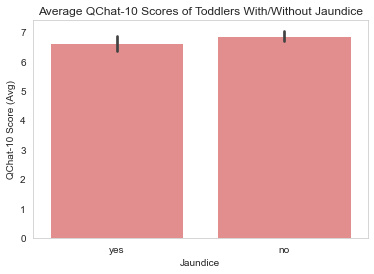

In [22]:
# Plotting Average QChat-10 Scores of Toddlers with/without jaundice
sns.set_style("whitegrid",{'axes.grid' : False})
ax = sns.barplot(x = 'Jaundice', y = 'qchat_score', data = df, color='lightcoral')
ax.set_title('Average QChat-10 Scores of Toddlers With/Without Jaundice')
ax.set_xlabel('Jaundice')
ax.set_ylabel('QChat-10 Score (Avg)')
plt.savefig('Jaundice_Age.png')
plt.show();

In [23]:
df.groupby('Jaundice').qchat_score.describe()

,count,mean,std,min,25%,50%,75%,max
Jaundice,,,,,,,,
no,513.0,6.867446,1.892102,4.0,5.0,7.0,8.0,10.0
yes,215.0,6.600000,1.983106,4.0,5.0,7.0,8.0,10.0


### One-Way ANOVA

ANOVA is a parametric test (it has parameter estimates) used when the researcher wants to verify if there are differences between the means of a certain variable (response variable) in relation to a treatment with two or more categorical levels (predictive variable). The t test is also used in this type of procedure (with a maximum of two levels), but ANOVA is indicated for analyzes with an “n” sample greater than 30.

In this methodology, we will measure the F-Value, which is the relationship between the variance between groups divided by the variance within groups. Thus, it is clear to say that the greater the variance between groups, the more different the two variables will be. So, the higher the value of F, the greater the evidence that the variables are different from each other and that they influence each other. 

Conversely true, larger F values mean smaller p values — statistical significance.


***
**"Ethnicity" vs "qchat_score"**

Null Hypothesis: There is no statisticially significant difference of mean qchat scores between groups of ethnicity.

Alternative Hypothesis: There is a statisticially significant difference of mean qchat scores between groups of ethnicity.

***

In [24]:
# Calculate test statistic and p-value
print(stats.f_oneway(df['qchat_score'][df['Ethnicity'] == 'White European'],
                df['qchat_score'][df['Ethnicity'] == 'asian'], 
                df['qchat_score'][df['Ethnicity'] == 'middle eastern'],
               df['qchat_score'][df['Ethnicity'] == 'south asian'],
               df['qchat_score'][df['Ethnicity'] == 'black'],
               df['qchat_score'][df['Ethnicity'] == 'Hispanic'],
               df['qchat_score'][df['Ethnicity'] == 'Others'],
               df['qchat_score'][df['Ethnicity'] == 'Latino'],
               df['qchat_score'][df['Ethnicity'] == 'mixed'],
               df['qchat_score'][df['Ethnicity'] == 'Pacifica'],
               df['qchat_score'][df['Ethnicity'] == 'Native Indian']))

print('We reject the null hypothesis since our p-value is less than 0.05')

F_onewayResult(statistic=2.7692942391845814, pvalue=0.0023152025613468693)
We reject the null hypothesis since our p-value is less than 0.05


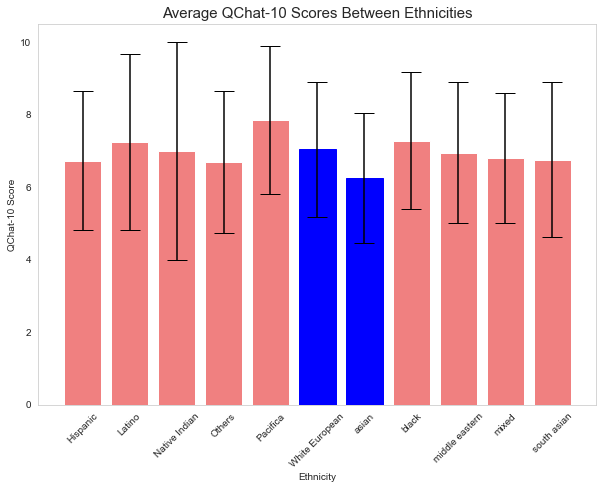

In [25]:
# Bar graph of ANOVA
mean= df.groupby('Ethnicity').qchat_score.mean()
error= df.groupby('Ethnicity').qchat_score.std()
x=mean.index
fig,ax=plt.subplots(figsize=(10,7))
barlist =plt.bar(x,mean,yerr=error,color='lightcoral',capsize=10)
barlist[6].set_color('b')
barlist[5].set_color('b')
plt.title('Average QChat-10 Scores Between Ethnicities',fontsize=15)
plt.xlabel('Ethnicity')
plt.ylabel('QChat-10 Score')
plt.xticks(x, rotation=45)
plt.savefig('one_way_anova.png')
plt.show();

### Post hoc test - Tukey's Test

Among the most used multiple comparison tests, the Tukey Test stands out for being powerful in making comparisons between all pairs and also for being easy to apply. It is also known as the Tukey HSD Test (Tukey Test of Honestly Significant Difference).

In [26]:
# Post hoc test to see where the differences lie 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df['qchat_score'], df['Ethnicity'])
mc_results = mc.tukeyhsd()
print(mc_results)
print('Post hoc tests show that the mean differences of age between asian and white european groups are significantly different')

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
      Hispanic         Latino   0.5167    0.9 -1.2535  2.2869  False
      Hispanic  Native Indian   0.2667    0.9 -3.4465  3.9799  False
      Hispanic         Others  -0.0437    0.9 -1.6406  1.5532  False
      Hispanic       Pacifica   1.1238    0.9 -1.4502  3.6978  False
      Hispanic White European   0.3147    0.9 -0.8702  1.4995  False
      Hispanic          asian  -0.4692    0.9 -1.6653   0.727  False
      Hispanic          black   0.5487    0.9 -0.9404  2.0379  False
      Hispanic middle eastern   0.2146    0.9  -1.068  1.4972  False
      Hispanic          mixed   0.0667    0.9 -2.8954  3.0288  False
      Hispanic    south asian   0.0234    0.9 -1.4831    1.53  False
        Latino  Native Indian    -0.25    0.9 -4.0466  3.5466  False
        Latino         Others  -0.

In [27]:
df.groupby('Ethnicity').qchat_score.describe()

,count,mean,std,min,25%,50%,75%,max
Ethnicity,,,,,,,,
Hispanic,30.0,6.733333,1.910648,4.0,5.0,6.5,8.75,10.0
Latino,20.0,7.250000,2.425197,4.0,5.0,8.5,9.00,10.0
Native Indian,3.0,7.000000,3.000000,4.0,5.5,7.0,8.50,10.0
Others,29.0,6.689655,1.965841,4.0,5.0,6.0,8.00,10.0
Pacifica,7.0,7.857143,2.035401,4.0,7.5,8.0,9.00,10.0
White European,250.0,7.048000,1.864296,4.0,5.0,7.0,9.00,10.0
asian,212.0,6.264151,1.794155,4.0,5.0,6.0,8.00,10.0
black,39.0,7.282051,1.891097,4.0,5.5,8.0,9.00,10.0
middle eastern,96.0,6.947917,1.943246,4.0,5.0,7.0,8.25,10.0


### Findings and Limitations

There is no significant difference in average qchat-10 scores between those who were/were not born with jaundice ( p = 0.72) and between sex ( p * = 0.09). White european and asian toddlers had the most significant difference in average qchat-10 scores ( p < 0.05).

Limitations of our model include who was filling out the survey for the toddlers, there may have been some bias in the responses, e.g. social desirability bias. Another limitation are the responses used for the survey, using a likert scale rather than yes/no responses can better capture the child's behavior.